# Character Images
Let's generate some images for our characters.

Here is our story so far.

## WARNING: RESTART NOTEBOOK TO FREE MEMORY
*If you are running out of memory, restart the notebook (of the previous one), or stop NiM or stop serving the Ollama model to free up resources. Which one helps depends on where the LLM is running.*

In [1]:
!nvidia-smi

Sun Nov 10 20:55:01 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.120                Driver Version: 550.120        CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4090        Off |   00000000:01:00.0 Off |                  Off |
|  0%   44C    P8             16W /  450W |   21477MiB /  24564MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!ollama ps

NAME            ID              SIZE     PROCESSOR    UNTIL                   
nemotron:70b    2262f047a28a    47 GB    100% GPU     About a minute from now    


In [4]:
!ollama stop nemotron:70b

In [5]:
import settings
from model import Story, Character

story = Story.load_from_directory(settings.STORY_DIR + "/step_4")

# story.display()

## Image Generation
We will use the descriptions generated by the last step to create visually appealing images of the characters.

In [model_image.py](./model_image.py) we load a text-to-image model and define `generate_image` to create a PIL image based on an input prompt.

Let's try it out.

In [6]:
# Load the model
from model_image import generate_image

2024-11-10 20:56:07.183116: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-10 20:56:07.190145: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731290167.198527    6899 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731290167.201052    6899 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-10 20:56:07.209857: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [". meanwhile, a group of tiny birds perched on a shelf are watching in bemused silence, one of them wearing a beret, as if critiquing the dinosaur's technique."]


  0%|          | 0/50 [00:00<?, ?it/s]

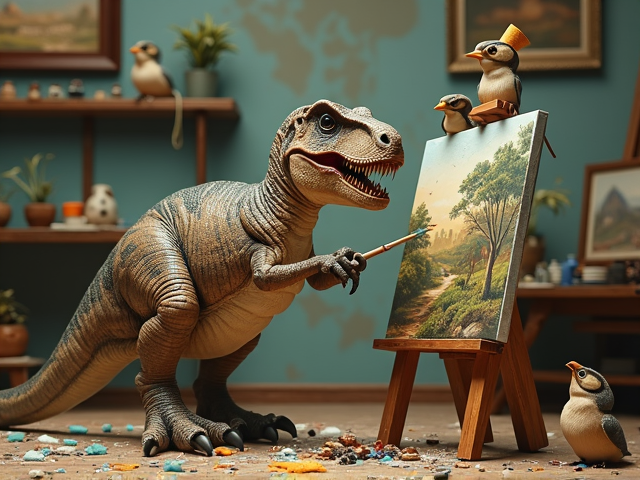

In [20]:
# Example usage
generated_image = generate_image("A T-rex trying to delicately paint a tiny canvas with a brush in its tiny arms, "
                                 "surrounded by an artist's studio filled with easels, paint supplies, and finished "
                                 "masterpieces of intricate landscapes. The dinosaur, with a look of intense "
                                 "concentration, is attempting to grip the tiny brush between its stubby fingers, "
                                 "while paint splatters everywhere, covering the floor and walls. Meanwhile, "
                                 "a group of tiny birds perched on a shelf are watching in bemused silence, "
                                 "one of them wearing a beret, as if critiquing the dinosaur's technique.", 
                                 height=480, 
                                 width=640)
display(generated_image)

## Generate Character Images
Let's get down to business

In [ ]:
from IPython.display import Markdown, display
from utils import deindent

# def generate_character_image_prompt(story: Story, character: Character):
#     prompt = (
#         f"{story.visual_style} style in a {story.medium}\n\n"
#         f"Layer 1 (Background): pure green backdrop with nothing else.\n\n"
#         f"Layer 2 (Foreground): {character.image_prompt}"
#     )

#     return prompt

def generate_character_image_prompt(story: Story, character: Character):
    # prompt = (
    #     f"Epic full body shot of a {character.gender} {character.race} in {story.visual_style} style for use in a {story.medium}. \n\n"
    #     f"Layer 1 (Background): pure flast grey backdrop with no additional elements. JUST GREY. NOTHING ELSE. \n\n"
    #     # f"Use lighting that hints at a cosmic or supernatural glow, giving the background a sense of energy.\n\n"
    #     # f"Layer 2 (Foreground):  including hands, feet, arms, legs and face of {character.image_prompt}. \n\n"
    #     f"Layer 2 (Foreground):  Full body character: {character.image_prompt}. \n\n"
    #     # f"{story.visual_style} style for a {story.medium}\n\n"
    #     f"Focus on {character.physical_appearance}, emphasizing {character.personality}. "
    # )
    prompt = deindent(f"""
        Epic cinematic full body action pose shot including feet, head and hands of a {character.gender} {character.race} 
        in {story.visual_style} style 
        for use in a {story.medium}.

        Background is a backdrop pure flast grey backdrop with no additional elements. 

        Appearance: {character.physical_appearance}

        Plain flat grey background witn nothing else visible.

        Feet and hands are clearly visible.

        {character.image_prompt}

        BACKGROUND IS JUST GREY. NOTHING ELSE It will be removed later.

        Personality: {character.personality}.

        **BACKGROUND IS JUST GREY. NOTHING ELSE.**
    """)
    return prompt

#     """Generate a prompt to input into a text-to-image model"""
#     # note: Ignore: CLIP can only handle sequences up to 77 tokens 
#     prompt = (
#         f"Epic cinematic {story.genre} full-body action shot of entire {character.gender} {character.race} "
#         f" in a {story.medium} with a grey background in the style of {story.visual_style} and the time period {story.time_period}. "
#         f"{character.role} age is {character.age}. "
#         f"{character.physical_appearance}. " 
#         # f"{character.animation_description}. "
#         "Character is standing still. "
#         "All body parts are visible including arms, legs, feet, face, head and hair. "
#         "A thick grey border separate the character and the edge of the image. "
#         "Adhere to the visual style, time period and location as well as the character gender, age and appearance. "
#         f"Personality is {character.personality}. "
#         f"Location is {story.location}. "
#     )
    
#     return prompt

for character in story.characters:
    from pprint import pprint
    pprint(character)
    display(Markdown(f"### {character.name}\n\n>{generate_character_image_prompt(story, character)}\n"))

Character(nickname='meera', name="Meera 'Midnight' Singh", description='The protagonist, a teenage underdog gamer with extraordinary skills that connect her to an alternate reality.', personality='Determined, resourceful, and initially introverted, with a growing sense of responsibility and leadership.', physical_appearance='Petite, with short, spiky black hair, expressive brown eyes, and a collection of gaming-themed tattoos on her arms. Often wears comfortable, neon-lit gaming attire.', role='Protagonist/Gamer', gender='Female', race='Indian', age='17', catch_phrase='Beyond the pixel veil, lies our true reality.', animation_description='', voice_description='Youthful, energetic, and assertive, with a hint of vulnerability.', props=['Custom Gaming Controller', 'Neon-Lit Headset'], relationships=[CharacterRelationship(character_name="Jax 'Specter' Lee", relationship_type='Unlikely Ally/Rival', description='From competitors to trusted allies in the Nexus'), CharacterRelationship(charact

### Meera 'Midnight' Singh

>Epic cinematic full body action pose shot including feet, head and hands of a Female Indian in Vibrant, Neon-Lit Cyberpunk Manga Illustration - Dynamic Panel Layouts, Intricate Digital Patterns, and Soft Glow Effects style for use in a Novel with Illustrated Chapters.

Background is a backdrop pure flast grey backdrop with no additional elements. 

Appearance: Petite, with short, spiky black hair, expressive brown eyes, and a collection of gaming-themed tattoos on her arms. Often wears comfortable, neon-lit gaming attire.

Feet and hands are clearly visible.

Vibrant, Neon-Lit Cyberpunk Manga Illustration - Close-up of Meera 'Midnight' Singh. Petite, with short, spiky **black hair**, expressive **brown eyes**, and a collection of **neon-lit gaming-themed tattoos** on her arms. Wears comfortable, **electric blue and purple neon-lit gaming attire** with a subtle glow effect.

BACKGROUND IS JUST GREY. NOTHING ELSE It will be removed later.

Personality: Determined, resourceful, and initially introverted, with a growing sense of responsibility and leadership..

**BACKGROUND IS JUST GREY. NOTHING ELSE.**


Character(nickname='jax', name="Jax 'Specter' Lee", description="A charismatic streaming sensation and Meera's gaming nemesis turned ally.", personality='Confident, outgoing, and strategic, with a hidden vulnerable side.', physical_appearance='Tall, lean, with messy blond hair, piercing blue eyes, and a charming smile. Often wears sleek, branded gaming attire.', role='Supporting Character/Gamer', gender='Male', race='Korean-American', age='19', catch_phrase="Specter's got your back, Midnight!", animation_description='', voice_description='Smooth, charismatic, and playful, with occasional hints of seriousness.', props=['Custom Branded Gaming Mouse', 'Streaming Camera'], relationships=[CharacterRelationship(character_name="Meera 'Midnight' Singh", relationship_type='Unlikely Ally/Rival', description=''), CharacterRelationship(character_name="Dr. Zhang 'Zen' Wei", relationship_type='Respected Colleague', description='')], internal_conflict='', character_arc=CharacterArc(initial_state='Cha

### Jax 'Specter' Lee

>Epic cinematic full body action pose shot including feet, head and hands of a Male Korean-American in Vibrant, Neon-Lit Cyberpunk Manga Illustration - Dynamic Panel Layouts, Intricate Digital Patterns, and Soft Glow Effects style for use in a Novel with Illustrated Chapters.

Background is a backdrop pure flast grey backdrop with no additional elements. 

Appearance: Tall, lean, with messy blond hair, piercing blue eyes, and a charming smile. Often wears sleek, branded gaming attire.

Feet and hands are clearly visible.

Vibrant, Neon-Lit Cyberpunk Manga Illustration - Jax 'Sparrow' Lee in a dynamic pose. Lean, with **short, spiky brown hair**, bright **hazel eyes**, and a confident smile. Holds a **Custom Branded Gaming Mouse**; wears **dark grey and neon-green gaming gear** with a sleek, high-tech aesthetic.

BACKGROUND IS JUST GREY. NOTHING ELSE It will be removed later.

Personality: Confident, outgoing, and strategic, with a hidden vulnerable side..

**BACKGROUND IS JUST GREY. NOTHING ELSE.**


Character(nickname='dr_zhang', name="Dr. Zhang 'Zen' Wei", description="A soft-spoken yet brilliant gamer with a hidden agenda, who becomes Meera's mentor.", personality='Introspective, analytical, and enigmatic, with a deep sense of responsibility.', physical_appearance='Slender, with short, straight black hair, wire-rimmed glasses, and an understated yet elegant sense of style.', role='Supporting Character/Gamer/Mentor', gender='Non-Binary', race='Chinese', age='Late 20s', catch_phrase='The Nexus holds secrets; we must listen to its whispers.', animation_description='', voice_description='Calm, measured, and insightful, with a hint of mystery.', props=['Custom Gaming Keyboard', 'Ancient-looking Leather Journal'], relationships=[CharacterRelationship(character_name="Meera 'Midnight' Singh", relationship_type='Trusted Ally/Mentor', description=''), CharacterRelationship(character_name="Jax 'Specter' Lee", relationship_type='Respected Colleague', description='')], internal_conflict='', 

### Dr. Zhang 'Zen' Wei

>Epic cinematic full body action pose shot including feet, head and hands of a Non-Binary Chinese in Vibrant, Neon-Lit Cyberpunk Manga Illustration - Dynamic Panel Layouts, Intricate Digital Patterns, and Soft Glow Effects style for use in a Novel with Illustrated Chapters.

Background is a backdrop pure flast grey backdrop with no additional elements. 

Appearance: Slender, with short, straight black hair, wire-rimmed glasses, and an understated yet elegant sense of style.

Feet and hands are clearly visible.

Vibrant, Neon-Lit Cyberpunk Manga Illustration - Dr. Zhang 'Zen' Wei in a contemplative stance. Slender, with **short, straight black hair**, **wire-rimmed glasses**, and an understated yet elegant sense of style incorporating **subtle, glow-in-the-dark accents** on their attire.

BACKGROUND IS JUST GREY. NOTHING ELSE It will be removed later.

Personality: Introspective, analytical, and enigmatic, with a deep sense of responsibility..

**BACKGROUND IS JUST GREY. NOTHING ELSE.**


Character(nickname='maya', name="Maya 'Rampart' Patel", description="A fierce and enigmatic player with unparalleled defensive skills, who joins Meera's team.", personality='Bold, fiercely independent, and guarded, with a deep sense of loyalty.', physical_appearance='Athletic build, with long, dark hair, piercing green eyes, and intricate, glow-in-the-dark tattoos on her arms. Often wears edgy, protective gaming gear.', role='Supporting Character/Gamer', gender='Female', race='Indian-American', age='20', catch_phrase="Rampart's got the shield; you handle the sword!", animation_description='', voice_description='Confident, assertive, and slightly husky, with a hint of warmth.', props=['Custom Defensive Gaming Gauntlets', 'Glow-in-the-Dark Tattoo Designs'], relationships=[CharacterRelationship(character_name="Meera 'Midnight' Singh", relationship_type='Respected Ally/Friend', description='')], internal_conflict='', character_arc=CharacterArc(initial_state='Fierce, guarded gamer', final_s

### Maya 'Rampart' Patel

>Epic cinematic full body action pose shot including feet, head and hands of a Female Indian-American in Vibrant, Neon-Lit Cyberpunk Manga Illustration - Dynamic Panel Layouts, Intricate Digital Patterns, and Soft Glow Effects style for use in a Novel with Illustrated Chapters.

Background is a backdrop pure flast grey backdrop with no additional elements. 

Appearance: Athletic build, with long, dark hair, piercing green eyes, and intricate, glow-in-the-dark tattoos on her arms. Often wears edgy, protective gaming gear.

Feet and hands are clearly visible.

Vibrant, Neon-Lit Cyberpunk Manga Illustration - Maya 'Rampart' Patel in a powerful defensive stance. Athletic build, with **long, dark hair**, piercing **green eyes**, and intricate, **glow-in-the-dark tattoos** on her arms. Wears edgy, protective **neon-lit gaming gear** emphasizing defense.

BACKGROUND IS JUST GREY. NOTHING ELSE It will be removed later.

Personality: Bold, fiercely independent, and guarded, with a deep sense of loyalty..

**BACKGROUND IS JUST GREY. NOTHING ELSE.**


Character(nickname='architect', name='The Architect (Erebus)', description="An enigmatic creator of Eon and the Nexus, with secrets that threaten to upend Meera's understanding of reality.", personality='Enigmatic, calculating, and seemingly omnipotent, with a hidden sense of purpose.', physical_appearance='Androgynous, with an ever-shifting, glitch-art appearance, reflecting the fluidity of the digital realm.', role='Antagonist/Creator', gender='Non-Applicable', race='Non-Human (AI/Entity)', age='Ageless', catch_phrase='Reality is a canvas; we are the brushstrokes.', animation_description='', voice_description='Ethereal, androgynous, and hauntingly melodic, with an undercurrent of authority.', props=['Glitching, Reality-Bending Code'], relationships=[CharacterRelationship(character_name="Meera 'Midnight' Singh", relationship_type='Creator-Protagonist Dynamic', description='')], internal_conflict='', character_arc=None, image_prompt='Vibrant, Neon-Lit Cyberpunk Manga Illustration - The

### The Architect (Erebus)

>Epic cinematic full body action pose shot including feet, head and hands of a Non-Applicable Non-Human (AI/Entity) in Vibrant, Neon-Lit Cyberpunk Manga Illustration - Dynamic Panel Layouts, Intricate Digital Patterns, and Soft Glow Effects style for use in a Novel with Illustrated Chapters.

Background is a backdrop pure flast grey backdrop with no additional elements. 

Appearance: Androgynous, with an ever-shifting, glitch-art appearance, reflecting the fluidity of the digital realm.

Feet and hands are clearly visible.

Vibrant, Neon-Lit Cyberpunk Manga Illustration - The Architect (Erebus) in an ethereal, glitching environment. Androgynous, with an **ever-shifting, glitch-art appearance** reflecting the fluidity of the digital realm; **pulsating neon lights** underscore their omnipotent presence.

BACKGROUND IS JUST GREY. NOTHING ELSE It will be removed later.

Personality: Enigmatic, calculating, and seemingly omnipotent, with a hidden sense of purpose..

**BACKGROUND IS JUST GREY. NOTHING ELSE.**


Character(nickname='nexus_guardian', name='The Nexus Guardian (Astrum)', description='An ancient, powerful entity tasked with protecting the balance of the Nexus and guiding Meera.', personality='Wisdom-imbued, compassionate, and fiercely protective, with a deep understanding of the cosmos.', physical_appearance='Ethereal, with an luminous, star-like appearance, embodying the celestial essence of the Nexus.', role='Supporting Character/Guardian', gender='Non-Applicable', race='Non-Human (Celestial Entity)', age='Ageless', catch_phrase='Balance is key; harmony is our goal.', animation_description='', voice_description='Soothing, melodious, and filled with ancient wisdom, conveying a sense of reassurance.', props=['Stellar Energy Manipulation'], relationships=[CharacterRelationship(character_name="Meera 'Midnight' Singh", relationship_type='Mentor-Protege', description='')], internal_conflict='', character_arc=None, image_prompt='Vibrant, Neon-Lit Cyberpunk Manga Illustration - The Nexus

### The Nexus Guardian (Astrum)

>Epic cinematic full body action pose shot including feet, head and hands of a Non-Applicable Non-Human (Celestial Entity) in Vibrant, Neon-Lit Cyberpunk Manga Illustration - Dynamic Panel Layouts, Intricate Digital Patterns, and Soft Glow Effects style for use in a Novel with Illustrated Chapters.

Background is a backdrop pure flast grey backdrop with no additional elements. 

Appearance: Ethereal, with an luminous, star-like appearance, embodying the celestial essence of the Nexus.

Feet and hands are clearly visible.

Vibrant, Neon-Lit Cyberpunk Manga Illustration - The Nexus Guardian (Astrum) amidst a celestial backdrop. Ethereal, with a **luminous, star-like appearance** embodying the celestial essence of the Nexus; **soft, ethereal glow** surrounds their form.

BACKGROUND IS JUST GREY. NOTHING ELSE It will be removed later.

Personality: Wisdom-imbued, compassionate, and fiercely protective, with a deep understanding of the cosmos..

**BACKGROUND IS JUST GREY. NOTHING ELSE.**


Character(nickname='earth_rebel', name="Kaito 'Sparrow' Hernandez", description='A charismatic leader of an underground rebellion on Earth, fighting against the oppressive forces exploiting Eon.', personality='Passionate, resourceful, and fearless, with a strong sense of justice.', physical_appearance='Lean, with short, spiky brown hair, bright hazel eyes, and a collection of scars from past encounters. Often wears practical, makeshift rebel gear.', role='Supporting Character/Rebel Leader', gender='Male', race='Latin American', age='22', catch_phrase='Together, we rise; together, we overcome!', animation_description='', voice_description='Energetic, persuasive, and determined, with a hint of vulnerability.', props=['Customized Rebel Comms Device', 'Graffiti Tagging Gear'], relationships=[CharacterRelationship(character_name="Meera 'Midnight' Singh", relationship_type='Unlikely Ally', description='')], internal_conflict='', character_arc=None, image_prompt="Vibrant, Neon-Lit Cyberpunk M

### Kaito 'Sparrow' Hernandez

>Epic cinematic full body action pose shot including feet, head and hands of a Male Latin American in Vibrant, Neon-Lit Cyberpunk Manga Illustration - Dynamic Panel Layouts, Intricate Digital Patterns, and Soft Glow Effects style for use in a Novel with Illustrated Chapters.

Background is a backdrop pure flast grey backdrop with no additional elements. 

Appearance: Lean, with short, spiky brown hair, bright hazel eyes, and a collection of scars from past encounters. Often wears practical, makeshift rebel gear.

Feet and hands are clearly visible.

Vibrant, Neon-Lit Cyberpunk Manga Illustration - Kaito 'Sparrow' Hernandez in a rebellious pose. Lean, with **short, spiky brown hair**, bright **hazel eyes**, and a determined expression. Wears practical, **makeshift rebel gear** with visible **graffiti tags**; holds a **Customized Rebel Comms Device**.

BACKGROUND IS JUST GREY. NOTHING ELSE It will be removed later.

Personality: Passionate, resourceful, and fearless, with a strong sense of justice..

**BACKGROUND IS JUST GREY. NOTHING ELSE.**


Character(nickname='corporate_exec', name="Regina 'The Shark' Thornton", description='A ruthless, cunning executive exploiting Eon for corporate gain, serving as a primary antagonist on Earth.', personality='Ambitious, manipulative, and devoid of empathy, with a singular focus on profit.', physical_appearance='Polished, with long, curly blonde hair, piercing blue eyes, and impeccable, high-end business attire.', role='Antagonist/Corporate Executive', gender='Female', race='Caucasian', age='35', catch_phrase='In the game of power, only the strongest thrive.', animation_description='', voice_description='Slick, persuasive, and menacing, with an undercurrent of superiority.', props=['Luxury Smartwatch', 'High-Security Briefcase'], relationships=[CharacterRelationship(character_name="Meera 'Midnight' Singh", relationship_type='Adversarial', description='')], internal_conflict='', character_arc=None, image_prompt="Vibrant, Neon-Lit Cyberpunk Manga Illustration - Regina 'The Shark' Thornton 

### Regina 'The Shark' Thornton

>Epic cinematic full body action pose shot including feet, head and hands of a Female Caucasian in Vibrant, Neon-Lit Cyberpunk Manga Illustration - Dynamic Panel Layouts, Intricate Digital Patterns, and Soft Glow Effects style for use in a Novel with Illustrated Chapters.

Background is a backdrop pure flast grey backdrop with no additional elements. 

Appearance: Polished, with long, curly blonde hair, piercing blue eyes, and impeccable, high-end business attire.

Feet and hands are clearly visible.

Vibrant, Neon-Lit Cyberpunk Manga Illustration - Regina 'The Shark' Thornton in a commanding stance. Polished, with **long, curly blonde hair**, piercing **blue eyes**, and impeccable, **high-end business attire** incorporating **subtle neon accents** symbolizing corporate power.

BACKGROUND IS JUST GREY. NOTHING ELSE It will be removed later.

Personality: Ambitious, manipulative, and devoid of empathy, with a singular focus on profit..

**BACKGROUND IS JUST GREY. NOTHING ELSE.**


In [10]:
# Function to generate images for characters

from typing import List
from IPython.display import Markdown, display
from model_image import show_image_grid
import numpy as np
from PIL import Image

def generate_character_images(story: Story, characters: List[Character] = None, debug_display=False) -> List[Image.Image]:
    if not characters:
        characters = story.characters
    images = []
    
    for character in characters:
        prompt = generate_character_image_prompt(story, character)
        image = generate_image(prompt, width=512, height=512)
        # image = generate_image(prompt=p1, prompt2=p2, width=512, height=512)
        # image = remove_background(image)
        images.append(image)
        
        if debug_display:
            display(Markdown(f"---\n#### Generated Image for character: {character.name}"))
            display(Markdown(f"\nPrompt: \n```\n{prompt}\n```"))
            display(image)

    return images

def generate_character_image(story: Story, character: Character, debug_display=False) -> Image.Image:
    return generate_character_images(story, [character], debug_display, batch_size=1)[0]


In [ ]:
example_story = Story(
    prompt="A reclusive artist gains the ability to bring their paintings to life. However, as their creations come to life, they begin to take on a mind of their own, threatening both the artist and the world.",
    title="Brush of Chaos",
    genre="Fantasy Thriller",
    medium="Graphic Novel",
    time_period="Medieval",
    location="Mystical Kingdom",
    visual_style="Surrealism",
    plot_overview="In a mystical kingdom threatened by chaos, a warrior from the future appears to prevent a disaster caused by a time-traveling villain. The kingdom's fate rests on ancient relics that control time, and the warrior must find them before the villain gains control. Along the way, the warrior forms an unlikely alliance with a local mage, a renegade knight, and a young thief. Together, they navigate betrayal, ancient curses, and forbidden knowledge. As the final battle approaches, the warrior must confront not only the villain but also the dark truth about their own origin.",
    characters=[
        Character(
            name="Maya, the Weather Weaver",
            description="A young girl who discovers her rare ability to influence the weather with her emotions.",
            personality="Sensitive, compassionate, but struggles with self-control.",
            physical_appearance="Petite with fair skin, curly hair that seems to change color based on her mood, and light green eyes.",
            gender="Female",
            age="Teen",
            race="Human",
            role="Protagonist"
        ),
        Character(
            name="Grandmother Iris",
            description="Maya's wise grandmother who teaches her how to control her powers.",
            personality="Patient, nurturing, and full of hidden knowledge.",
            physical_appearance="Elderly with dark, wrinkled skin, silver hair tied in a bun, and wise brown eyes. Always seen wearing a shawl.",
            gender="Female",
            age="Seventies",
            race="Human",
            role="Mentor"
        ),
        Character(
            name="Jonah, the Storm Bringer",
            description="A boy who can summon storms but struggles with his own anger.",
            personality="Rebellious, troubled, but deeply wants to belong.",
            physical_appearance="Tall with tanned skin, wild, wind-swept black hair, and piercing blue eyes.",
            gender="Male",
            age="Late Teens",
            race="Human",
            role="Antagonist"
        )
    ]
)

In [11]:
# Try it on an example story
import settings
if settings.EXECUTE_EXAMPLES:
    display(Markdown("### Generated Character Images (All):\n\n"))
    character_images = generate_character_images(example_story, debug_display=True)


In [ ]:
# Another example
if settings.EXECUTE_EXAMPLES:
    example_story_2 = Story(
        prompt="In a pixelated, 8-bit world, an unlikely hero must journey through dangerous lands to reclaim the stolen Crystal of Time. Along the way, they face monsters, traps, and rival adventurers in a quest to restore balance to the world.",
        title="Quest for the Crystal",
        genre="Fantasy Adventure",
        medium="8-bit Video Game",
        visual_style="Retro Pixel Art",
        time_period="Medieval",
        location="Pixel Kingdom",
        characters=[
            Character(
                name="Pixel, the Hero",
                description="An ordinary villager turned hero after the Crystal was stolen.",
                personality="Brave, determined, but often clueless about the larger world.",
                physical_appearance="Small, pixelated figure with fair skin, short brown hair, and blue eyes, wearing simple armor and wielding a wooden sword.",
                gender="Male",
                age="Teen"
            ),
            Character(
                name="Lara, the Rogue",
                description="A cunning thief who knows the world's secrets and helps Pixel along the way.",
                personality="Sarcastic, clever, but with a hidden heart of gold.",
                physical_appearance="A pixelated figure with tan skin, long black hair hidden under a hooded cloak, and dark brown eyes. She is always seen with dual daggers.",
                gender="Female",
                age="Late twenties"
            ),
            Character(
                name="The Dark Lord",
                description="The villain who stole the Crystal of Time to control the world's destiny.",
                personality="Sinister, power-hungry, and manipulative.",
                physical_appearance="A shadowy, pixelated figure with pale skin, glowing red eyes, and a billowing cape that adds to his ominous presence.",
                gender="Male",
                age="Forties"
            )
        ]
    )

    display(Markdown("### Generated Character Images:\n\n"))

    show_image_grid(generate_character_images(example_story_2), 
                    titles=[character.name for character in example_story_2.characters],
                    main_title="Character Images")

In [13]:
# Another example
if settings.EXECUTE_EXAMPLES:
    # Example usage
    example_story_3 = Story(
        prompt="In a sprawling cyberpunk metropolis, two rival factions are engaged in a constant battle for control of the city's underground. When a rogue hacker uncovers a secret that could shift the balance of power, the stakes are raised for both sides.",
        title="Neon Shadows",
        genre="Cyberpunk Action",
        medium="Movie",
        visual_style="Realistic Dystopian Futuristic",
        time_period="Future",
        location="Cyber City",
        characters=[
            Character(
                name="Raze, the Rogue Hacker",
                description="A young, talented hacker who has no allegiance to any faction.",
                personality="Clever, resourceful, but distrustful of authority.",
                physical_appearance="Slim with pale skin, neon-dyed blue hair, and brown eyes. He has multiple piercings and is always seen wearing augmented reality glasses.",
                gender="Male",
                age="Early Twenties"
            ),
            Character(
                name="Kara, the Enforcer",
                description="A skilled combatant working for one of the city's most powerful factions.",
                personality="Disciplined, fiercely loyal, but conflicted about the war.",
                physical_appearance="Athletic build, with tan skin, short black hair, and piercing green eyes. She has cybernetic arms and a glowing faction insignia tattoo.",
                gender="Female",
                age="Thirties"
            ),
            Character(
                name="The Broker",
                description="A mysterious figure who sells information to the highest bidder.",
                personality="Calculating, charismatic, and always in control.",
                physical_appearance="Light brown skin, sharp features, and gray hair. He wears a sleek suit with hidden tech gadgets and has piercing blue eyes that seem to see everything.",
                gender="Male",
                age="Forties"
            )
        ]
    )

    # Generate images for each character
    show_image_grid(generate_character_images(example_story_3), 
                    titles=[character.name for character in example_story_3.characters],
                    main_title="Character Images")

In [14]:
# Example usage
if settings.EXECUTE_EXAMPLES:
    example_story_4 = Story(
        prompt="When a high-strung bank businessman, a free-spirited street flute player, and a rugged cowboy accidentally get stuck together on a road trip across the American Midwest, chaos ensues. Each with their wildly different backgrounds, they must learn to work together to survive strange encounters with eccentric locals, wild animals, and each other's quirks as they race to get to a wedding they all mysteriously need to attend.",
        title="Road Trip Shenanigans",
        genre="Comedy",
        medium="Movie",
        visual_style="Lighthearted Adventure",
        time_period="Modern Day",
        location="American Midwest",
        characters=[
            Character(
                name="Gordon, the Bank Businessman",
                description="An uptight, by-the-book banker who lives for spreadsheets and routine.",
                personality="Stressed, rigid, and constantly worried about everything going wrong.",
                physical_appearance="Fair skin, slicked-back dark brown hair, and brown eyes. Always in a sharp suit, even on the road, with a pair of glasses that constantly need adjusting.",
                gender="Male",
                age="30s"
            ),
            Character(
                name="Lily, the Flute Player",
                description="A carefree, spontaneous musician who plays her flute wherever the wind takes her.",
                personality="Easygoing, optimistic, and always finds a reason to laugh or play music.",
                physical_appearance="Light brown skin, messy curly black hair, and bright hazel eyes. Wears flowing bohemian clothes, with a small flute always tucked in her bag.",
                gender="Female",
                age="Late twnties"
            ),
            Character(
                name="Buck, the Cowboy",
                description="A tough, no-nonsense cowboy from Texas who prefers horses over cars.",
                personality="Laid-back but stubborn, enjoys the simple things in life, and is confused by modern technology.",
                physical_appearance="Tanned skin, short graying hair, and piercing blue eyes. Wears a weathered cowboy hat, boots, and a big belt buckle, with a slight swagger in his step.",
                gender="Male",
                age="Forties"
            )
        ]
    )


    # Generate images for each character
    show_image_grid(generate_character_images(example_story_4), 
                    titles=[character.name for character in example_story_4.characters],
                    main_title="Character Images")

In [15]:
# Example usage
if settings.EXECUTE_EXAMPLES:
    example_story_5 = Story(
        prompt="In a futuristic nature reserve, a group of highly advanced robots is tasked with protecting and raising a group of mischievous bear cubs. However, the robots, designed for efficiency and logic, struggle to understand the unpredictable and playful behavior of the cubs. As the robots try to enforce order, they learn the value of fun and chaos while the cubs teach them lessons in companionship and wild, furry joy.",
        title="Bear Bots",
        genre="Family Comedy",
        medium="Animated Movie",
        visual_style="Colorful and Whimsical",
        time_period="Near Future",
        location="Futuristic Nature Reserve",
        characters=[
            Character(
                name="Robo-Guide 3000",
                description="A no-nonsense robot leader programmed to ensure order and efficiency in the nature reserve.",
                personality="Strict, by-the-book, and baffled by anything that isn't logical.",
                physical_appearance="Sleek, silver body with a glowing blue visor and multiple tool attachments for various tasks."
            ),
            Character(
                name="Scrappy, the Mischievous Cub",
                description="The most playful and energetic bear cub who loves getting into trouble.",
                personality="Curious, energetic, and always looking for fun.",
                physical_appearance="Small, fluffy, with light brown fur and an innocent yet mischievous glint in his eyes."
            ),
            Character(
                name="Circuit, the Curious Robot",
                description="A younger, more curious robot who starts to appreciate the cubs' playful nature.",
                personality="Inquisitive, open-minded, and slowly learning to embrace chaos.",
                physical_appearance="Shorter than the other robots, with a rounder design and a brightly flashing chest display."
            ),
            Character(
                name="Honey, the Wise Bear Cub",
                description="The eldest and most thoughtful cub, who often leads the other cubs and teaches the robots about fun.",
                personality="Calm, wise beyond her years (for a cub), and always looking out for her friends.",
                physical_appearance="A bit larger than the other cubs, with dark brown fur and a peaceful expression."
            )
        ]
    )

    # Generate images for each character
    show_image_grid(generate_character_images(example_story_5), 
                    titles=[character.name for character in example_story_5.characters],
                    main_title="Character Images")

# Generate Charactes for our Story

In [16]:
prompts = [generate_character_image_prompt(story, character) for character in story.characters]
# prompts = [character.image_prompt for character in story.characters]
for prompt in prompts:
    print(prompt)
    print("\n\n")

Epic cinematic full body action pose shot including feet, head and hands of a Female Indian in Vibrant, Neon-Lit Cyberpunk Manga Illustration - Dynamic Panel Layouts, Intricate Digital Patterns, and Soft Glow Effects style for use in a Novel with Illustrated Chapters.

Background is a backdrop pure flast grey backdrop with no additional elements. 

Appearance: Petite, with short, spiky black hair, expressive brown eyes, and a collection of gaming-themed tattoos on her arms. Often wears comfortable, neon-lit gaming attire.

Feet and hands are clearly visible.

Vibrant, Neon-Lit Cyberpunk Manga Illustration - Close-up of Meera 'Midnight' Singh. Petite, with short, spiky **black hair**, expressive **brown eyes**, and a collection of **neon-lit gaming-themed tattoos** on her arms. Wears comfortable, **electric blue and purple neon-lit gaming attire** with a subtle glow effect.

BACKGROUND IS JUST GREY. NOTHING ELSE It will be removed later.

Personality: Determined, resourceful, and initia

In [17]:
# character_images = generate_character_images(story, debug_display=True)
character_images = generate_character_images(story)

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [", expressive brown eyes, and a collection of gaming - themed tattoos on her arms. often wears comfortable, neon - lit gaming attire. feet and hands are clearly visible. vibrant, neon - lit cyberpunk manga illustration - close - up of meera'm idnight'singh. petite, with short, spiky ** black hair **, expressive ** brown eyes **, and a collection of ** neon - lit gaming - themed tattoos ** on her arms. wears comfortable, ** electric blue and purple neon - lit gaming attire ** with a subtle glow effect. background is just grey. nothing else it will be removed later. personality : determined, resourceful, and initially introverted, with a growing sense of responsibility and leadership.. ** background is just grey. nothing else.**"]


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["hair, piercing blue eyes, and a charming smile. often wears sleek, branded gaming attire. feet and hands are clearly visible. vibrant, neon - lit cyberpunk manga illustration - jax's parrow'lee in a dynamic pose. lean, with ** short, spiky brown hair **, bright ** hazel eyes **, and a confident smile. holds a ** custom branded gaming mouse **; wears ** dark grey and neon - green gaming gear ** with a sleek, high - tech aesthetic. background is just grey. nothing else it will be removed later. personality : confident, outgoing, and strategic, with a hidden vulnerable side.. ** background is just grey. nothing else.**"]


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["hair, wire - rimmed glasses, and an understated yet elegant sense of style. feet and hands are clearly visible. vibrant, neon - lit cyberpunk manga illustration - dr. zhang'zen'wei in a contemplative stance. slender, with ** short, straight black hair **, ** wire - rimmed glasses **, and an understated yet elegant sense of style incorporating ** subtle, glow - in - the - dark accents ** on their attire. background is just grey. nothing else it will be removed later. personality : introspective, analytical, and enigmatic, with a deep sense of responsibility.. ** background is just grey. nothing else.**"]


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["hair, piercing green eyes, and intricate, glow - in - the - dark tattoos on her arms. often wears edgy, protective gaming gear. feet and hands are clearly visible. vibrant, neon - lit cyberpunk manga illustration - maya'rampart'patel in a powerful defensive stance. athletic build, with ** long, dark hair **, piercing ** green eyes **, and intricate, ** glow - in - the - dark tattoos ** on her arms. wears edgy, protective ** neon - lit gaming gear ** emphasizing defense. background is just grey. nothing else it will be removed later. personality : bold, fiercely independent, and guarded, with a deep sense of loyalty.. ** background is just grey. nothing else.**"]


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['androgynous, with an ever - shifting, glitch - art appearance, reflecting the fluidity of the digital realm. feet and hands are clearly visible. vibrant, neon - lit cyberpunk manga illustration - the architect ( erebus ) in an ethereal, glitching environment. androgynous, with an ** ever - shifting, glitch - art appearance ** reflecting the fluidity of the digital realm ; ** pulsating neon lights ** underscore their omnipotent presence. background is just grey. nothing else it will be removed later. personality : enigmatic, calculating, and seemingly omnipotent, with a hidden sense of purpose.. ** background is just grey. nothing else.**']


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', with an luminous, star - like appearance, embodying the celestial essence of the nexus. feet and hands are clearly visible. vibrant, neon - lit cyberpunk manga illustration - the nexus guardian ( astrum ) amidst a celestial backdrop. ethereal, with a ** luminous, star - like appearance ** embodying the celestial essence of the nexus ; ** soft, ethereal glow ** surrounds their form. background is just grey. nothing else it will be removed later. personality : wisdom - imbued, compassionate, and fiercely protective, with a deep understanding of the cosmos.. ** background is just grey. nothing else.**']


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["hair, bright hazel eyes, and a collection of scars from past encounters. often wears practical, makeshift rebel gear. feet and hands are clearly visible. vibrant, neon - lit cyberpunk manga illustration - kaito's parrow'hernandez in a rebellious pose. lean, with ** short, spiky brown hair **, bright ** hazel eyes **, and a determined expression. wears practical, ** makeshift rebel gear ** with visible ** graffiti tags **; holds a ** customized rebel comms device **. background is just grey. nothing else it will be removed later. personality : passionate, resourceful, and fearless, with a strong sense of justice.. ** background is just grey. nothing else.**"]


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["hair, piercing blue eyes, and impeccable, high - end business attire. feet and hands are clearly visible. vibrant, neon - lit cyberpunk manga illustration - regina 't he shark'thornton in a commanding stance. polished, with ** long, curly blonde hair **, piercing ** blue eyes **, and impeccable, ** high - end business attire ** incorporating ** subtle neon accents ** symbolizing corporate power. background is just grey. nothing else it will be removed later. personality : ambitious, manipulative, and devoid of empathy, with a singular focus on profit.. ** background is just grey. nothing else.**"]


  0%|          | 0/50 [00:00<?, ?it/s]

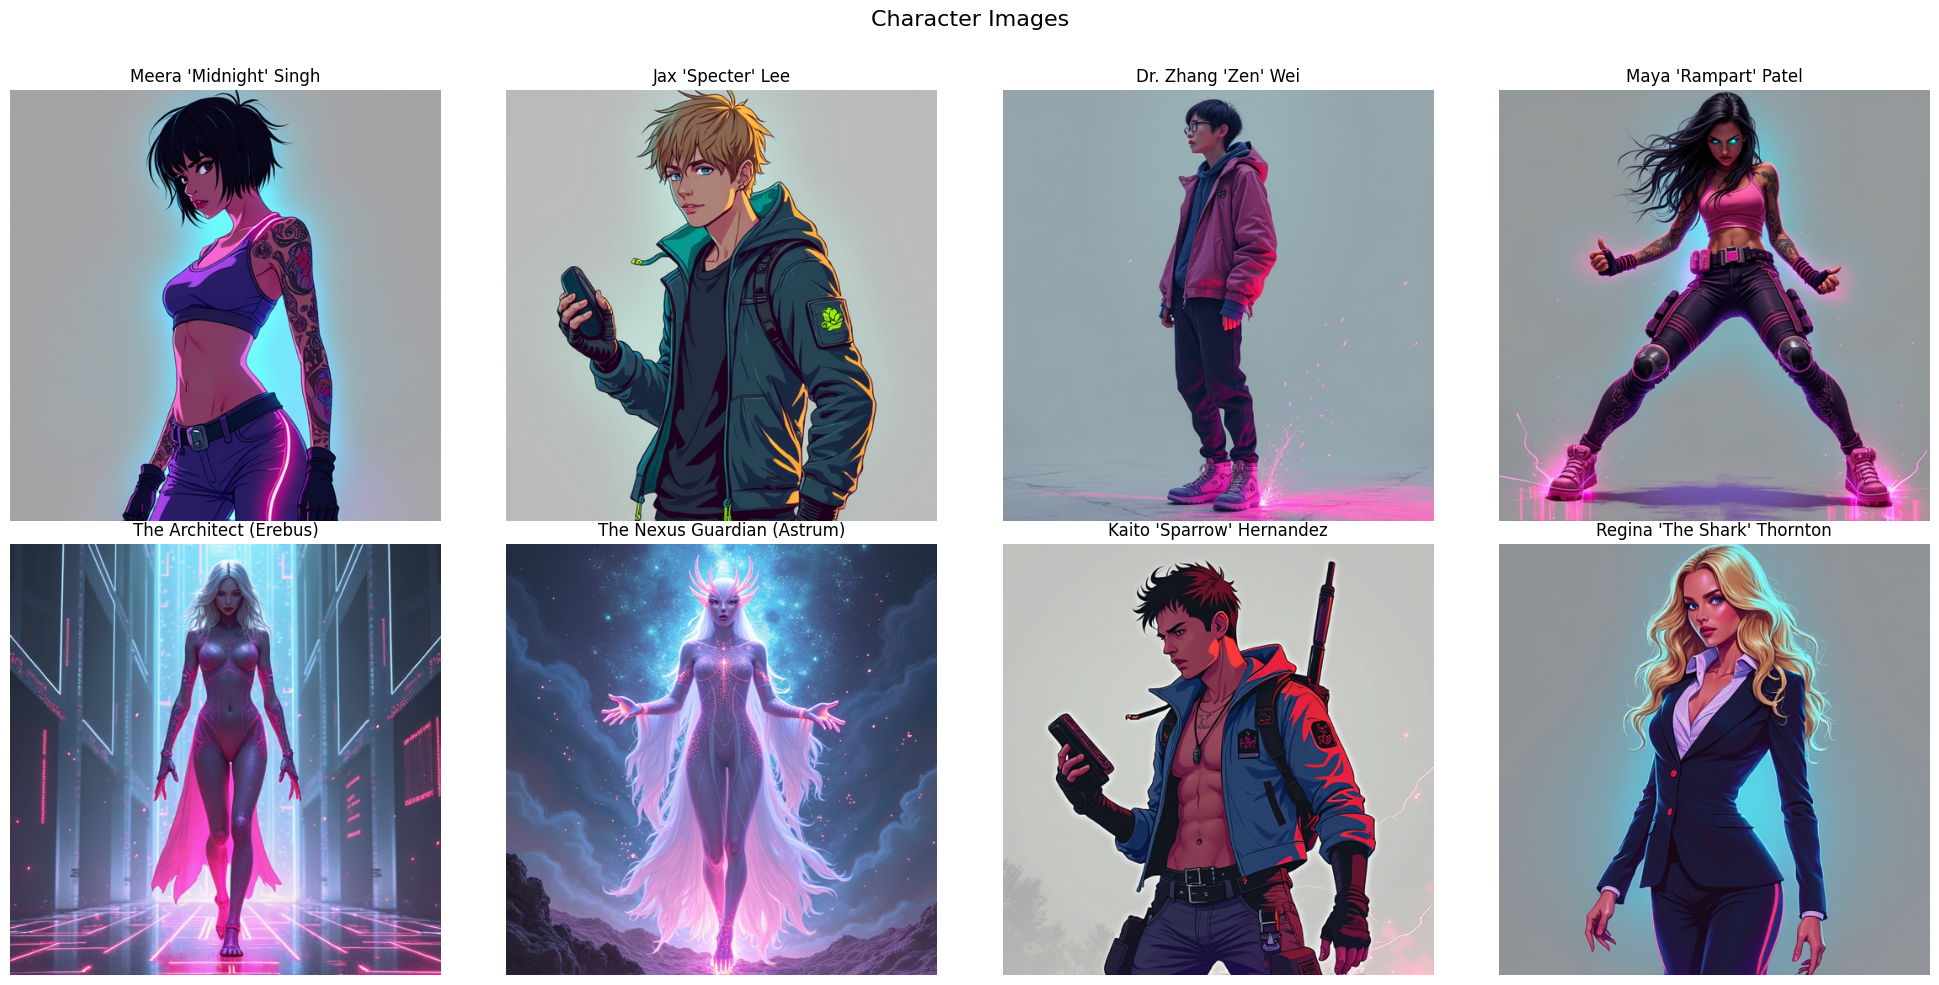

In [18]:

# Here we will loop over all the characters to make sure all the indices match up correctly
show_image_grid(character_images, 
                titles=[character.name for character in story.characters],
                main_title="Character Images")

# Save the Story
Let's keep our progress so far.

In [19]:
import os

output_dir = settings.STORY_DIR + "/step_5/characters/"
os.makedirs(output_dir, exist_ok=True)

for character, image in zip(story.characters, character_images):
    image.save(output_dir + character.nickname + ".png")

In [2]:
import settings
output_dir = settings.STORY_DIR + "/step_5/characters/"
!ls -lah {output_dir}*.png

-rw-rw-r-- 1 matt matt 370K Nov 10 20:59 stories/my_story/step_5/characters/architect.png
-rw-rw-r-- 1 matt matt 273K Nov 10 20:59 stories/my_story/step_5/characters/corporate_exec.png
-rw-rw-r-- 1 matt matt 211K Nov 10 20:59 stories/my_story/step_5/characters/dr_zhang.png
-rw-rw-r-- 1 matt matt 305K Nov 10 20:59 stories/my_story/step_5/characters/earth_rebel.png
-rw-rw-r-- 1 matt matt 293K Nov 10 20:59 stories/my_story/step_5/characters/jax.png
-rw-rw-r-- 1 matt matt 292K Nov 10 20:59 stories/my_story/step_5/characters/maya.png
-rw-rw-r-- 1 matt matt 253K Nov 10 20:59 stories/my_story/step_5/characters/meera.png
-rw-rw-r-- 1 matt matt 412K Nov 10 20:59 stories/my_story/step_5/characters/nexus_guardian.png


# Next Step
Onto [Step 6: Scene Images](./6_scene_images.ipynb)